Training Loss at epoch=1/20: 0.02035404285519196
Training Loss at epoch=2/20: 0.015189391687980159
Training Loss at epoch=3/20: 0.013069350064768084
Training Loss at epoch=4/20: 0.011886642580084296
Training Loss at epoch=5/20: 0.011118565192700384
Training Loss at epoch=6/20: 0.010572467368954366
Training Loss at epoch=7/20: 0.010160249607551733
Training Loss at epoch=8/20: 0.009835613331597628
Training Loss at epoch=9/20: 0.009571757688580398
Training Loss at epoch=10/20: 0.00935202940010758
Training Loss at epoch=11/20: 0.009165504028094181
Training Loss at epoch=12/20: 0.009004699506082951
Training Loss at epoch=13/20: 0.008864306658314938
Training Loss at epoch=14/20: 0.008740443974984073
Training Loss at epoch=15/20: 0.00863020003120403
Training Loss at epoch=16/20: 0.00853134189280304
Training Loss at epoch=17/20: 0.008442123344648448
Training Loss at epoch=18/20: 0.008361155257183837
Training Loss at epoch=19/20: 0.008287315792209681
Training Loss at epoch=20/20: 0.008219686822

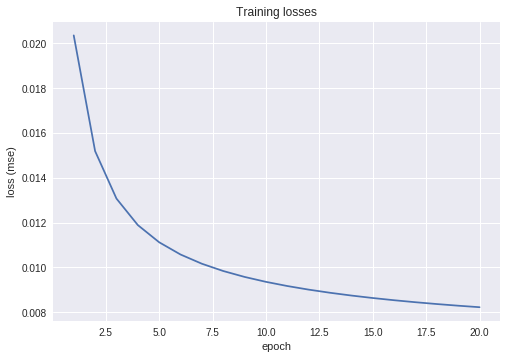

Test accuracy of the model is: 91.44%, ie 9144/10000


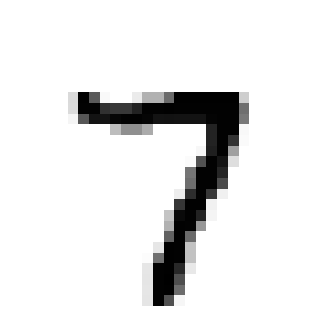

Above image is predicted as 7, which is True


In [8]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# TRAININF MODEL
class train_model:
    def __init__(self,X,Y,bs,epoch):
        self.X=X
        self.Y=Y
        self.epoch=epoch
        self.bs=bs
        self.SGD_MINI_BATCH()
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
  
    def mse_loss(self,T, P):
        return np.square(T-P).mean()
    
    def plot_losses(self,losses):  # TO GENERATE EPOCH VS LOSS PLOT
        plt.plot(range(1,len(losses)+1), losses)
        plt.xlabel("epoch")
        plt.ylabel("loss (mse)")
        plt.title('Training losses')
        plt.show()
    
    def SGD_MINI_BATCH(self):
        learning_rate = 0.02
        self.Weight = np.random.randn(self.Y.shape[1], self.X.shape[1]) * 0.01
        self.b = np.zeros((self.Y.shape[1], 1))
        losses=[]
        for i in range(self.epoch):
            for j in range(0,self.X.shape[0],self.bs):
                X_=self.X[j:j+self.bs]
                Y_=self.Y[j:j+self.bs]
                Z = np.dot(self.Weight,X_.T) + self.b
                A = self.sigmoid(Z)
                w_ =(1/self.bs)*np.dot((A - Y_.T),X_)
                b_ = (1/self.bs)* np.sum(A - Y_.T,axis=1,keepdims=True)
                self.loss = self.mse_loss(A.T,Y_)
                self.Weight = self.Weight - learning_rate*w_
                self.b = self.b - learning_rate*b_
            losses.append(self.loss)
            print('Training Loss at epoch='+str(i+1)+'/'+str(self.epoch)+': '+str(self.loss))
        self.plot_losses(losses)

# CALL FOR PREDICTION OF CLASS
def predict(X,m):
    pred=[]
    for i in range(len(X)):
        z=np.dot(X[i],m.Weight.T)+m.b.flatten()
        prob = 1 / (1 + np.exp(-z))
        pred.append(np.argmax(prob))
    return np.array(pred)

def show_image(x):
    image = x.reshape(28,28)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Load the training and test data using Keras, And Reshaping
(train_images, train_y), (test_images, test_y) = mnist.load_data()
train_X=train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]).astype('float')
train_X=train_X/255
test_X=test_images.reshape(-1, test_images.shape[1]*test_images.shape[2]).astype('float')
test_X=test_X/255

# Labeling for Each classes (0 to 9) (Y is matrix and y is a vector)
train_Y=np.zeros(shape=(10,len(train_y)), dtype='int')
test_Y=np.zeros(shape=(10,len(test_y)), dtype='int')
for j in range(len(train_y)):
    train_Y[train_y[j]][j]=1
for j in range(len(test_y)):
    test_Y[test_y[j]][j]=1    

# MODELING
batch_size=50
epoch=20
model=train_model(train_X,train_Y.T,batch_size,epoch)

# Prediction and TESTING
prediction=predict(test_X,model)
print('Test accuracy of the model is: '+str(100*np.sum(prediction==test_y)/len(prediction))+'%, ie '+str(np.sum(prediction==test_y))+'/'+str(len(test_y)))

# PLOTING 
rand_num = np.random.randint(0,len(test_y))
show_image(test_X[rand_num])
print('Above image is predicted as '+str(prediction[rand_num])+', which is '+str(prediction[rand_num]==test_y[rand_num]) )
